In [1]:
import fmskill
from fmskill import ModelResult, PointObservation, TrackObservation, Connector
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
fmskill.__version__

'0.4.dev2'

In [3]:
o1 = PointObservation('../tests/testdata/SW/HKNA_Hm0.dfs0', item=0, x=4.2420, y=52.6887, name="HKNA")
o2 = PointObservation("../tests/testdata/SW/eur_Hm0.dfs0", item=0, x=3.2760, y=51.9990, name="EPL")
o3 = TrackObservation("../tests/testdata/SW/Alti_c2_Dutch.dfs0", item=3, name="c2")

## Model Results

In [4]:
fn = r"..\tests\testdata\SW\CMEMS_DutchCoast_*.nc"
mr1 = ModelResult(fn, name='CMEMS', item='VHM0')
mr1

<XArrayModelResultItem> 'CMEMS'
- Item: VHM0

In [5]:
mr2 = ModelResult('../tests/testdata/SW/HKZN_local_2017_DutchCoast.dfsu', name='MIKE21SW', item=0)

## Connect and extract

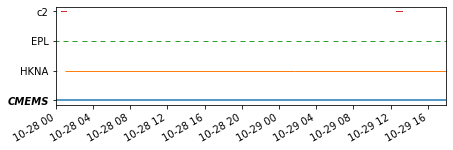

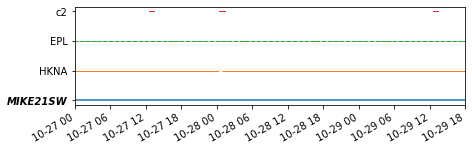

In [6]:
con1 = Connector([o1,o2,o3],mr1)
con2 = Connector([o1,o2,o3],mr2)
con1.plot_temporal_coverage(), con2.plot_temporal_coverage();

In [7]:
cc1 = con1.extract()
cc2 = con2.extract()

In [8]:
cc1.skill()

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
EPL,43,-0.440930,0.518713,0.273210,0.443256,0.920165,0.087342,0.445177
HKNA,242,-0.741920,0.881698,0.476388,0.741920,0.902987,0.123507,0.221544
c2,123,-0.349376,0.448139,0.280651,0.383551,0.912560,0.062328,0.529142


In [9]:
cc2.skill()

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
EPL,67,-0.066597,0.223597,0.213449,0.188513,0.969846,0.078296,0.932596
HKNA,386,-0.194260,0.351964,0.293499,0.251839,0.971194,0.088669,0.905300
c2,113,-0.001210,0.351796,0.351794,0.294585,0.974335,0.118511,0.899507


## Add the two Comparers

In [10]:
cc = cc1 + cc2

In [11]:
cc.skill()

n      bias      rmse     urmse       mae        cc  \
model    observation                                                          
CMEMS    EPL           43 -0.440930  0.518713  0.273210  0.443256  0.920165   
         HKNA         242 -0.741920  0.881698  0.476388  0.741920  0.902987   
         c2            41 -0.311355  0.474520  0.358089  0.402269  0.937073   
MIKE21SW EPL           43 -0.078281  0.204842  0.189294  0.173804  0.973262   
         HKNA         242 -0.229809  0.411363  0.341185  0.295643  0.948802   
         c2            41  0.327152  0.410106  0.247303  0.357670  0.964173   

                            si        r2  
model    observation                      
CMEMS    EPL          0.087342  0.445177  
         HKNA         0.123507  0.221544  
         c2           0.087109  0.740606  
MIKE21SW EPL          0.060515  0.913476  
         HKNA         0.088455  0.830548  
         c2           0.060159  0.806250